Variation in the code: Training the toy dataset into neural network using pytorch inbuilt functions

In [2]:
# Code by Bhavy Kharbanda
# Sap Id: 500082531

In [3]:
# Importing the libraries
import torch
import sklearn
import torch.nn as nn
import torch.nn.functional as F


In [4]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import RandomSampler, DataLoader

# make_classification to generate a random classification dataset
# train_test split to split the data in training and testing
# StandardScaler to Standardize features by removing the mean and scaling to unit variance.


In [5]:
# Creating The dataset
X, y = make_classification(n_samples=2000, n_classes=2, n_features=5)

# Normalizing the Dataset
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Converting Array to Tensor objects
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)
print(X)
print(y)
print(X.shape)
print(y.shape)
# Slicing the dataset in two different halves
X1 = X[1:1001,:]
X2 = X[1000:,:]
Y1 = y[1:1001]
Y2 = y[1000:]
print(X1.shape)
print(X2.shape)
print(Y1.shape)
print(Y2.shape)


tensor([[-0.0887,  0.1064,  0.1911, -0.1475,  0.0235],
        [-1.6020, -1.5879, -0.9963, -1.3002,  0.1559],
        [-1.5406, -1.2391, -0.5932, -1.3623,  0.2949],
        ...,
        [-0.3360,  0.0219,  0.2409, -0.4106, -1.3483],
        [-1.2038, -2.8414, -2.8373, -0.3364,  1.6825],
        [ 0.3725,  0.3330,  0.1857,  0.3164, -0.8535]])
tensor([1., 0., 0.,  ..., 1., 1., 1.])
torch.Size([2000, 5])
torch.Size([2000])
torch.Size([1000, 5])
torch.Size([1000, 5])
torch.Size([1000])
torch.Size([1000])


In [6]:
# For Model 1
X1_train, X1_test, y1_train, y1_test = train_test_split( X1, Y1, test_size=.3, random_state=4)
print("Size of training dataset: ")
print(X1_train.shape)
print("Size of testing dataset: ")
print(X1_test.shape)
# Direct function in sklearn to split the dataset


Size of training dataset: 
torch.Size([700, 5])
Size of testing dataset: 
torch.Size([300, 5])


In [7]:
# For Model 2
X2_train, X2_test, y2_train, y2_test = train_test_split( X2, Y2, test_size=.3, random_state=21)
print("Size of training dataset: ")
print(X2_train.shape)
print("Size of testing dataset: ")
print(X2_test.shape)
# Direct function in sklearn to split the dataset


Size of training dataset: 
torch.Size([700, 5])
Size of testing dataset: 
torch.Size([300, 5])


In [8]:
class NNpt(nn.Module):
    def __init__(self, n_features):
        super(NNpt, self).__init__()
        self.linear = nn.Linear(n_features, 1)

        self.linear.weight.detach().zero_()
        self.linear.bias.detach().zero_()

    def forward(self, x):
        out = self.linear(x)
        return out.view(-1)


def loss_fn(yhat, y):
    return torch.mean((yhat-y)**2)


In [9]:

def train(model, x, y, n_epoch=10, lr=0.001, seed=23, bsz=50):

    cost = []
    torch.manual_seed(seed)
    # To optimize our algorithm
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    for i in range(n_epoch):
        suffle_idx = torch.randperm(y.size(0))
        batches = torch.split(suffle_idx, bsz)

        for idx in batches:
            # 1. Compute the Output
            yhat = model.forward(x[idx])

            # 2. Compute the Loss
            loss = torch.nn.functional.mse_loss(yhat, y[idx])

            # 3. Compute the Gradients
            optimizer.zero_grad()
            loss.backward()

            # 4. Update the Model Parameters
            optimizer.step()

            # model.weight=model.weight-lr*grad_w
            # model.bias=model.bias-lr*grad_b

        # 5. Log and print the Loss
        with torch.no_grad():
            yhat = model.forward(x)
            curr_loss = loss_fn(yhat, y)
            print('Epoc: %3d ' % (i+1), end="")
            print('| MSE % .5f' % curr_loss)
            cost.append(curr_loss)

    return cost


For Model: 1

In [10]:
n_feature = X1_train.size(1)
model = NNpt(n_features=n_feature)
# Calling the model
cost = train(model, X1_train, y1_train, n_epoch=50)


Epoc:   1 | MSE  0.46288
Epoc:   2 | MSE  0.43525
Epoc:   3 | MSE  0.40975
Epoc:   4 | MSE  0.38619
Epoc:   5 | MSE  0.36442
Epoc:   6 | MSE  0.34427
Epoc:   7 | MSE  0.32561
Epoc:   8 | MSE  0.30833
Epoc:   9 | MSE  0.29230
Epoc:  10 | MSE  0.27742
Epoc:  11 | MSE  0.26360
Epoc:  12 | MSE  0.25076
Epoc:  13 | MSE  0.23882
Epoc:  14 | MSE  0.22772
Epoc:  15 | MSE  0.21738
Epoc:  16 | MSE  0.20774
Epoc:  17 | MSE  0.19876
Epoc:  18 | MSE  0.19039
Epoc:  19 | MSE  0.18258
Epoc:  20 | MSE  0.17528
Epoc:  21 | MSE  0.16847
Epoc:  22 | MSE  0.16211
Epoc:  23 | MSE  0.15616
Epoc:  24 | MSE  0.15061
Epoc:  25 | MSE  0.14541
Epoc:  26 | MSE  0.14054
Epoc:  27 | MSE  0.13598
Epoc:  28 | MSE  0.13172
Epoc:  29 | MSE  0.12773
Epoc:  30 | MSE  0.12398
Epoc:  31 | MSE  0.12048
Epoc:  32 | MSE  0.11719
Epoc:  33 | MSE  0.11410
Epoc:  34 | MSE  0.11121
Epoc:  35 | MSE  0.10850
Epoc:  36 | MSE  0.10595
Epoc:  37 | MSE  0.10356
Epoc:  38 | MSE  0.10132
Epoc:  39 | MSE  0.09921
Epoc:  40 | MSE  0.09723


Plot for Model: 1


[]

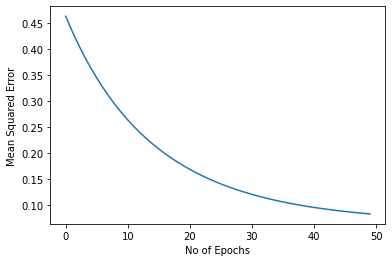

In [11]:
import matplotlib.pyplot as plt
plt.plot(range(len(cost)), cost)
plt.xlabel('No of Epochs')
plt.ylabel('Mean Squared Error')
plt.plot()

Accuracy Of Model: 1


In [12]:
ones=torch.ones(y1_train.size(0))
zero=torch.zeros(y1_train.size(0))
train_pred=model.forward(X1_train)

train_acc=torch.mean((torch.where( train_pred >0.5 , ones,zero).int()==y1_train).float())
#print(train_acc)

ones=torch.ones(y1_test.size(0))
zero=torch.zeros(y1_test.size(0))
test_pred=model.forward(X1_test)

test_acc=torch.mean((torch.where( test_pred >0.5 , ones,zero).int()==y1_test).float())
print("Accuracy for Model: 1")
print('Training Accuracy: %.2f' % (train_acc*100),'%')
print('Testing Accuracy: %.2f' % (test_acc*100),'%')

Accuracy for Model: 1
Training Accuracy: 91.00 %
Testing Accuracy: 94.33 %


For Model: 2

In [13]:
# For Model: 2
def train(model, x, y, n_epoch=10, lr=1, seed=23, bsz=50): # Changed the learning rate

    cost = []
    torch.manual_seed(seed)
    # To optimize our algorithm
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    for i in range(n_epoch):
        suffle_idx = torch.randperm(y.size(0))
        batches = torch.split(suffle_idx, bsz)

        for idx in batches:
            # 1. Compute the Output
            yhat = model.forward(x[idx])

            # 2. Compute the Loss
            loss = torch.nn.functional.mse_loss(yhat, y[idx])

            # 3. Compute the Gradients
            optimizer.zero_grad()
            loss.backward()

            # 4. Update the Model Parameters
            optimizer.step()

            # model.weight=model.weight-lr*grad_w
            # model.bias=model.bias-lr*grad_b

        # 5. Log and print the Loss
        with torch.no_grad():
            yhat = model.forward(x)
            curr_loss = loss_fn(yhat, y)
            print('Epoc: %3d ' % (i+1), end="")
            print('| MSE % .5f' % curr_loss)
            cost.append(curr_loss)

    return cost


In [14]:
n_feature = X2_train.size(1)
model = NNpt(n_features=n_feature)
# Calling the model
cost = train(model, X2_train, y2_train, n_epoch=50)

Epoc:   1 | MSE  1146014715084800.00000
Epoc:   2 | MSE  516182852354543093853214472142848.00000
Epoc:   3 | MSE  inf
Epoc:   4 | MSE  inf
Epoc:   5 | MSE  nan
Epoc:   6 | MSE  nan
Epoc:   7 | MSE  nan
Epoc:   8 | MSE  nan
Epoc:   9 | MSE  nan
Epoc:  10 | MSE  nan
Epoc:  11 | MSE  nan
Epoc:  12 | MSE  nan
Epoc:  13 | MSE  nan
Epoc:  14 | MSE  nan
Epoc:  15 | MSE  nan
Epoc:  16 | MSE  nan
Epoc:  17 | MSE  nan
Epoc:  18 | MSE  nan
Epoc:  19 | MSE  nan
Epoc:  20 | MSE  nan
Epoc:  21 | MSE  nan
Epoc:  22 | MSE  nan
Epoc:  23 | MSE  nan
Epoc:  24 | MSE  nan
Epoc:  25 | MSE  nan
Epoc:  26 | MSE  nan
Epoc:  27 | MSE  nan
Epoc:  28 | MSE  nan
Epoc:  29 | MSE  nan
Epoc:  30 | MSE  nan
Epoc:  31 | MSE  nan
Epoc:  32 | MSE  nan
Epoc:  33 | MSE  nan
Epoc:  34 | MSE  nan
Epoc:  35 | MSE  nan
Epoc:  36 | MSE  nan
Epoc:  37 | MSE  nan
Epoc:  38 | MSE  nan
Epoc:  39 | MSE  nan
Epoc:  40 | MSE  nan
Epoc:  41 | MSE  nan
Epoc:  42 | MSE  nan
Epoc:  43 | MSE  nan
Epoc:  44 | MSE  nan
Epoc:  45 | MSE  nan


[]

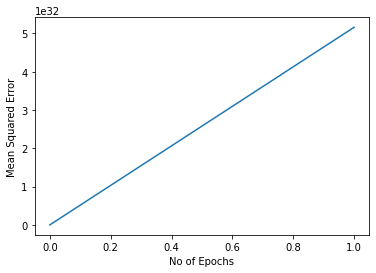

In [15]:
import matplotlib.pyplot as plt
plt.plot(range(len(cost)), cost)
plt.xlabel('No of Epochs')
plt.ylabel('Mean Squared Error')
plt.plot()


Accuracy of Model: 2

In [16]:
ones=torch.ones(y2_train.size(0))
zero=torch.zeros(y2_train.size(0))
train_pred=model.forward(X2_train)

train_acc=torch.mean((torch.where( train_pred >0.5 , ones,zero).int()==y2_train).float())
#print(train_acc)

ones=torch.ones(y2_test.size(0))
zero=torch.zeros(y2_test.size(0))
test_pred=model.forward(X2_test)

test_acc=torch.mean((torch.where( test_pred >0.5 , ones,zero).int()==y2_test).float())
print("Accuracy for Model: 2")
print('Training Accuracy: %.2f' % (train_acc*100),'%')
print('Testing Accuracy: %.2f' % (test_acc*100),'%')

Accuracy for Model: 2
Training Accuracy: 48.00 %
Testing Accuracy: 53.33 %
